In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
pd.set_option("display.max_colwidth", None) 
pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("gurgaon_properties_cleaned_phase2.csv")
temp_df = df.copy()

In [4]:
temp_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,shree vardhman flora,sector 90,0.96,5120.0,1875.0,Super Built up area 1875(174.19 sq.m.),3,4,3,3.0,North,New Property,1875.0,NaN,NaN,0,1,0,0,0,1,106
1,flat,dlf new town heights,sector 90,1.30,6735.0,1930.0,Super Built up area 1930(179.3 sq.m.)Built Up area: 1929 sq.ft. (179.21 sq.m.)Carpet area: 1928 sq.ft. (179.12 sq.m.),3,3,3,10.0,South,Relatively New,1930.0,1929.0,1928.0,0,1,0,1,0,0,129
2,flat,sare crescent parc royal greens phase 1,sector 92,1.25,5832.0,2143.0,Super Built up area 2143(199.09 sq.m.),4,4,3,20.0,East,Relatively New,2143.0,NaN,NaN,0,1,0,0,0,1,60
3,house,palam vihar extension west zone rwa,sector 2,0.35,6481.0,540.0,Plot area 600(55.74 sq.m.)Carpet area: 540 sq.ft. (50.17 sq.m.),2,2,0,1.0,North-East,New Property,NaN,NaN,540.0,0,0,0,0,0,1,0
4,flat,sare homes,sector 92,0.68,5238.0,1298.0,Carpet area: 1298 (120.59 sq.m.),3,3,2,11.0,North-West,Relatively New,NaN,NaN,1298.0,0,0,0,1,0,1,100


In [5]:
temp_df.shape

(3805, 23)

In [6]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3805 non-null   object 
 1   society              3804 non-null   object 
 2   sector               3805 non-null   object 
 3   price                3787 non-null   float64
 4   price_per_sqft       3787 non-null   float64
 5   area                 3787 non-null   float64
 6   areaWithType         3805 non-null   object 
 7   bedRoom              3805 non-null   int64  
 8   bathroom             3805 non-null   int64  
 9   balcony              3805 non-null   int64  
 10  floorNum             3786 non-null   float64
 11  facing               2700 non-null   object 
 12  agePossession        3805 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1187 non-null   float64
 15  carpet_area          1944 non-null   f

In [7]:
# check for null values 
temp_df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1105
agePossession             0
super_built_up_area    1890
built_up_area          2618
carpet_area            1861
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [8]:
# check for duplicated values 
temp_df.duplicated().sum()

126

In [9]:
# drop the duplicates rows 
temp_df.drop_duplicates(inplace=True)

In [10]:
temp_df.duplicated().sum()

0

## Univariate Analysis 

### property_type

In [11]:
temp_df["property_type"].value_counts()

flat     2818
house     861
Name: property_type, dtype: int64

In [12]:
temp_df["property_type"].isnull().sum()

0

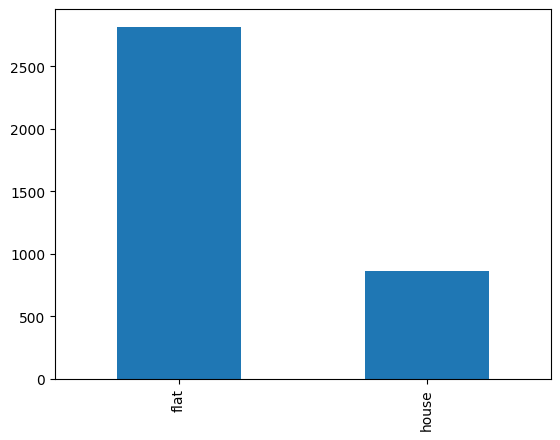

In [13]:
temp_df["property_type"].value_counts().plot(kind="bar");

#### Observations 
* no missing values 
* flats are in majority (about 76%) and house are about 24% 

### society 

In [14]:
temp_df["society"].value_counts().shape

(676,)

In [15]:
temp_df["society"].value_counts().head(50)

independent                             488
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
signature global park                    35
shree vardhman victoria                  34
smart world orchard                      32
emaar mgf emerald floors premier         32
paras dews                               31
dlf the ultima                           31
dlf regal gardens                        30
m3m woodshire                            30
shree vardhman flora                     29
la vida by tata housing                  28
smart world gems                         28
signature global solera                  27
godrej nature plus                       27
bptp terra                               25
tata primanti                            24
experion the heartsong                   24
vatika gurgaon                           24
emaar gurgaon greens            

In [16]:
temp_df["society"][temp_df["society"] != "independent"].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
shree vardhman victoria                 0.094357
emaar mgf emerald floors premier        0.104389
smart world orchard                     0.114420
paras dews                              0.124138
dlf the ultima                          0.133856
dlf regal gardens                       0.143260
m3m woodshire                           0.152665
shree vardhman flora                    0.161755
la vida by tata housing                 0.170533
smart world gems                        0.179310
signature global solera                 0.187774
godrej nature plus                      0.196238
bptp terra                              0.204075
tata primanti                           0.211599
experion the heartsong                  0.219122
vatika gurgaon      

In [17]:
society_counts = temp_df["society"].value_counts()

# getting the frequency distribution of the societies (creating the bins)
frequency_of_society = {
    "Very high (>100)": (society_counts > 100).sum(),
    "High (50 to 100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10 to 49)": ((society_counts >= 10) & (society_counts <= 49)).sum(),
    "Low (2 to 9)": ((society_counts >= 2) & (society_counts <= 9)).sum(),
    "Very low (1)": (society_counts == 1).sum()
}

In [18]:
frequency_of_society

{'Very high (>100)': 1,
 'High (50 to 100)': 2,
 'Average (10 to 49)': 92,
 'Low (2 to 9)': 273,
 'Very low (1)': 308}

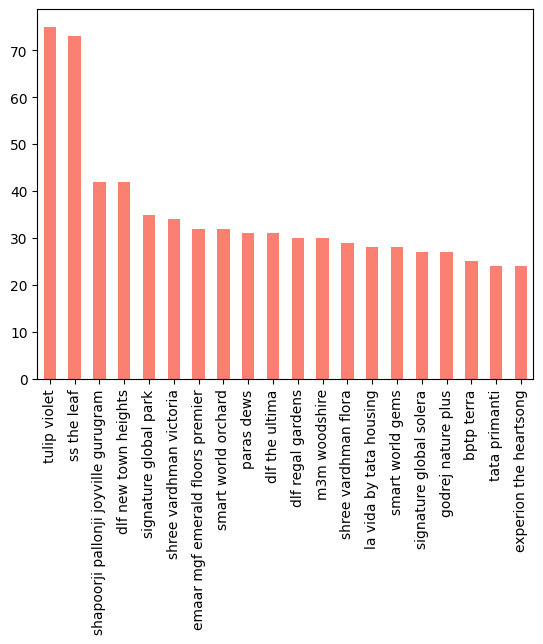

In [19]:
# plot the top 20 societies 
temp_df["society"][temp_df["society"] != "independent"].value_counts().head(20).plot(kind="bar", color="salmon");

In [20]:
# checking for null values 
temp_df["society"].isnull().sum()

1

In [21]:
temp_df[temp_df["society"].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1669,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,1,0


#### Observations 
* High cardinality (there are large number of categories)
* There are about 13% data which comes under the independent category 
* 1 missing value 
* The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    * Very High (>100): Only 1 society has more than 100 listings.
    * High (50-100): 2 societies have between 50 to 100 listings.
    * Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    * Low (2-9): 273 societies have between 2 to 9 listings.
    * Very Low (1): A significant number, 308 societies, have only 1 listing.

### sector 

In [22]:
temp_df["sector"].value_counts().shape

(98,)

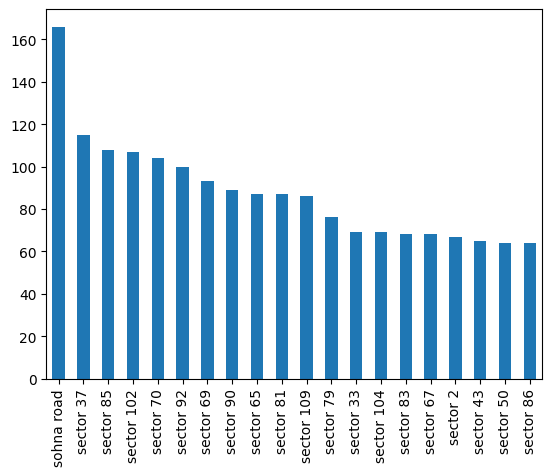

In [23]:
# plotting the top 20 sectors 
temp_df["sector"].value_counts().head(20).plot(kind="bar");

In [24]:
sector_count = temp_df["sector"].value_counts()

# getting the frequency distribution of sectors 
sector_frequency = {
    "Very High(>100)": (sector_count > 100).sum(),
    "High (50 to 100)": ((sector_count >= 50) & (sector_count <= 100)).sum(),
    "Average (10 to 49)": ((sector_count >= 10) & (sector_count <= 49)).sum(),
    "Low (2 to 9)": ((sector_count >= 2) & (sector_count <= 9)).sum(),
    "Very low (1)": (sector_count == 1).sum()
}

In [25]:
sector_frequency

{'Very High(>100)': 5,
 'High (50 to 100)': 23,
 'Average (10 to 49)': 53,
 'Low (2 to 9)': 17,
 'Very low (1)': 0}

#### Observations 
* High Cardinality Column
* There are 98 unique sectors in the dataset 
* Frequency Distribution of the dataset 
    * Very High(>100): There are 5 sectors having more than 100 listings,
    * High (50 to 100): There area 23 sectors having listings between 50 to 100,
    * Average (10 to 49): There area 53 sectors having listings between 10 to 49,
    * Low (2 to 9): There are 17 sectors having listings between 5 to 9,
    * Very low (1): No sector with 0 listings 

### price
* important column (output column)

In [26]:
# check for null values 
temp_df["price"].isnull().sum()

17

In [27]:
temp_df["price"].describe()

count    3662.000000
mean        2.534929
std         2.980422
min         0.070000
25%         0.950000
50%         1.525000
75%         2.750000
max        31.500000
Name: price, dtype: float64

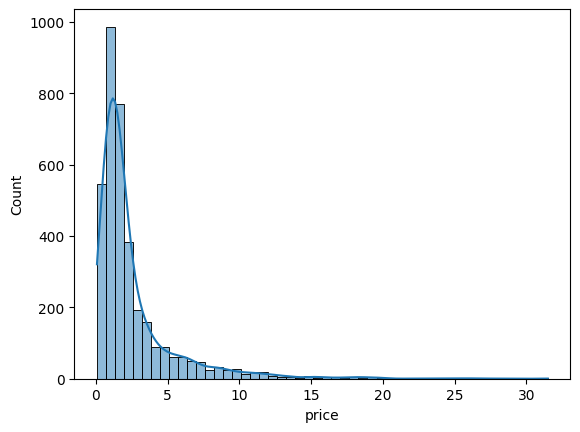

In [28]:
sns.histplot(temp_df["price"], kde=True, bins=50);

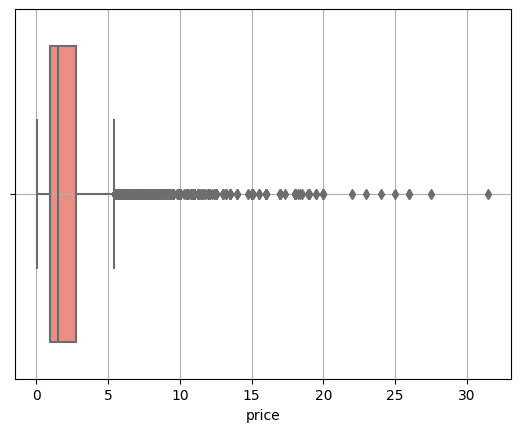

In [29]:
sns.boxplot(x=temp_df["price"], color="salmon")
plt.grid();

#### Observations 
* Count: There are 3662 non-missing values 
* Mean Price: The average price of the property is approximately 2.53 Cr.
* Median Price: The median (50th percentile) price is approximately 1.52 Cr
* Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
* Range: The price range varies from 0.07(minimum price) Cr to 31.5(max price) Cr 


* Missing values: There are 17 missing values 

In [30]:
# calculating skewness and kurtosis
skewness = temp_df["price"].skew()
kurtosis = temp_df["price"].kurtosis()

print(skewness, kurtosis)

3.2772152464431525 14.923344458728197


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [31]:
# Quantile Analysis 
quantiles = df["price"].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.490
0.99    15.014
Name: price, dtype: float64

#### Quantile Analysis:

* 1% Quantile: Only 1% of properties are priced below 0.25 crores.
* 5% Quantile: 5% of properties are priced below 0.37 crores.
* 95% Quantile: 95% of properties are priced below 8.5 crores.
* 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [32]:
# Calculating the IQR (Inter Quartile Range)
Q1 = temp_df["price"].describe()["25%"]
Q3 = temp_df["price"].describe()["75%"]

IQR = Q3-Q1
IQR

1.8

In [33]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [34]:
# find the outliers 
outliers_df = temp_df[(temp_df["price"] < lower_bound) | (temp_df["price"] > upper_bound)]

In [35]:
outliers_df.shape

(426, 23)

In [36]:
outliers_df["price"].describe()

count    426.000000
mean       9.228028
std        4.063498
min        5.460000
25%        6.445000
50%        8.000000
75%       10.702500
max       31.500000
Name: price, dtype: float64

#### Outlier Analysis (IQR)

* Based on the IQR method, there are 426 properties considered as outliers.
* The average price of this properties is about 9.2 CR
* The price range of this properties lies between 5.46 Cr to 31.5 Cr

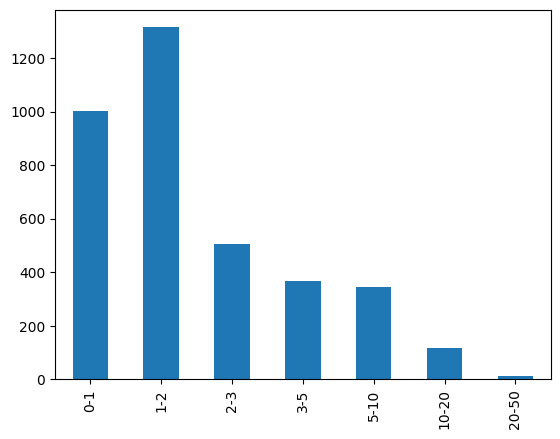

In [37]:
# plot the histogram using price binning 
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(temp_df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar');

####  Observations from price binning 
* Majority properties has price between 1-2 Crores.
* There is significant drop in the properties above 5 Crores and also the outliers are ranging in this range only.

#### As the graph of the price column follows right skew distribution, we can apply the log transformation 

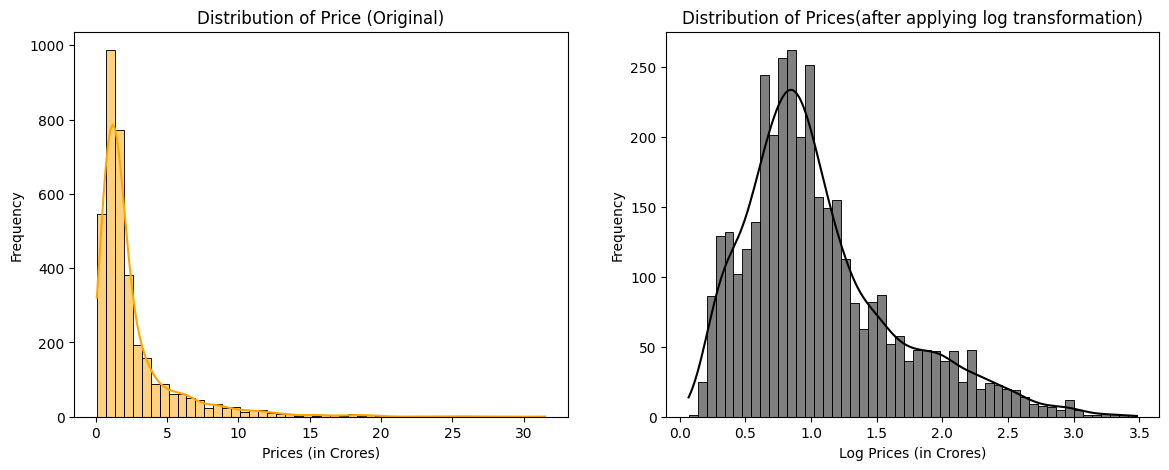

In [38]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(temp_df["price"], kde=True, bins=50, color="orange")
plt.title("Distribution of Price (Original)")
plt.xlabel("Prices (in Crores)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(temp_df["price"]), kde=True, bins=50, color="black")
plt.title("Distribution of Prices(after applying log transformation)")
plt.xlabel("Log Prices (in Crores)")
plt.ylabel("Frequency");

* np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

* Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [39]:
# Now calculate skewness and kurtosis after applying log transformation 
skewness = np.log1p(temp_df["price"].skew())
kurtosis = np.log1p(temp_df["price"].kurt())

print(skewness, kurtosis)

1.4533021544790559 2.7677862374185613


Text(0, 0.5, 'Frequency')

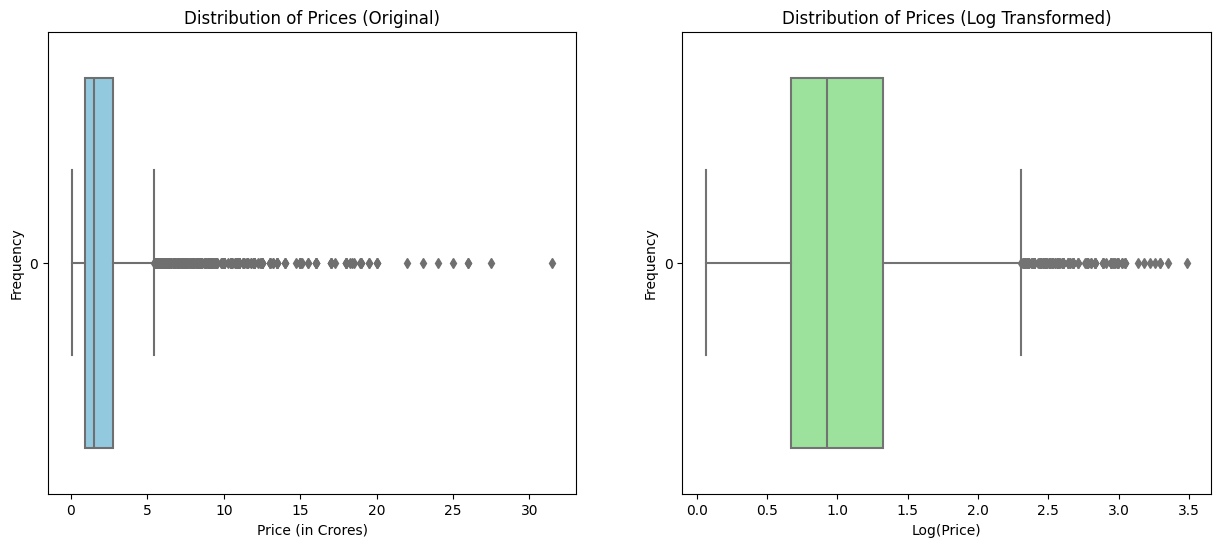

In [40]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(temp_df['price'], color='skyblue', orient='h')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(temp_df['price']), color='lightgreen', orient='h')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')


### price_per_sqft 


In [43]:
temp_df['price_per_sqft'].isnull().sum()

17

In [44]:
temp_df["price_per_sqft"].describe()

count      3662.000000
mean      13897.814855
std       23204.829200
min           4.000000
25%        6818.000000
50%        9021.000000
75%       13888.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

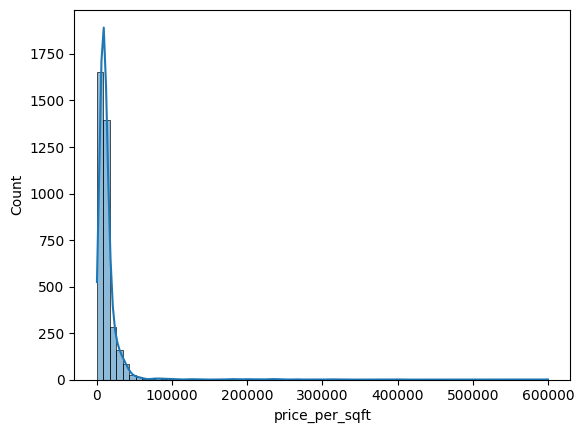

In [45]:
# plot the graph 
sns.histplot(temp_df["price_per_sqft"], bins=70, kde=True);

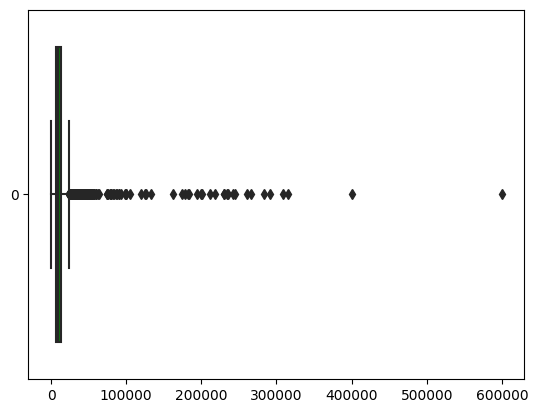

In [46]:
sns.boxplot(temp_df["price_per_sqft"], orient='h', color="green");

#### Observations
* Boxplot clearly showing that there are outliers on the higher side.
* There are 17 missing values 

### bedRoom 

In [47]:
temp_df["bedRoom"].value_counts()

3     1496
2      942
4      660
5      210
1      124
6       75
9       41
8       31
12      28
7       28
10      20
16      12
13       4
18       2
19       2
11       1
14       1
21       1
20       1
Name: bedRoom, dtype: int64

In [48]:
# check for null values 
temp_df["bedRoom"].isnull().sum()

0

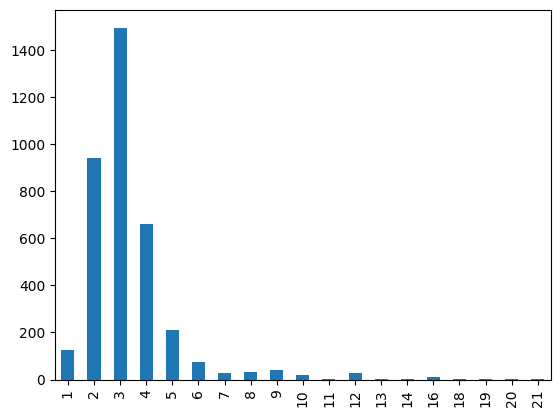

In [49]:
temp_df['bedRoom'].value_counts().sort_index().plot(kind='bar');

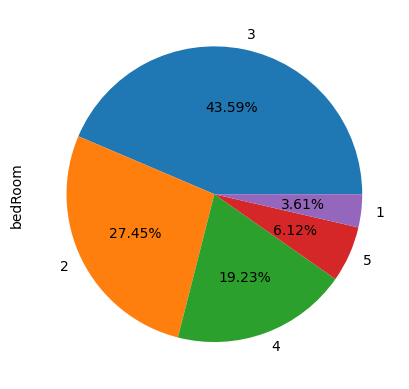

In [50]:
temp_df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%');

#### Observations 
* There are nearly 44% properties having 3 bedrooms
* no missing values.

### bathroom 

In [51]:
temp_df["bathroom"].value_counts()

3     1077
2     1047
4      820
5      294
1      156
6      117
9       41
7       41
8       26
12      22
10       9
16       8
18       4
13       4
11       4
17       3
20       3
14       2
21       1
Name: bathroom, dtype: int64

In [52]:
temp_df['bathroom'].isnull().sum()

0

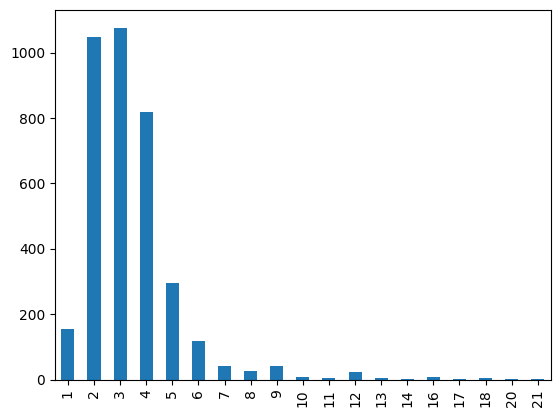

In [53]:
temp_df["bathroom"].value_counts().sort_index().plot(kind="bar");

<Axes: ylabel='bathroom'>

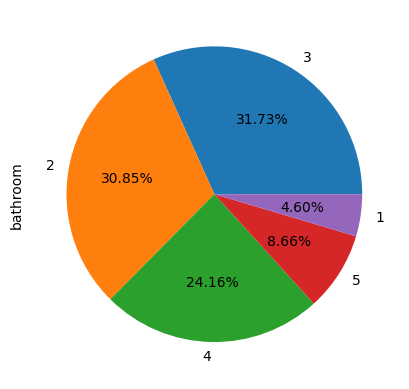

In [54]:
temp_df["bathroom"].value_counts(normalize=True).head().plot(kind="pie", autopct='%0.2f%%')

#### Observations
* most of the flats have 2, 3 or 4 bathrooms 
* no missing values 

### balcony 

In [55]:
temp_df["balcony"].isnull().sum()

0

In [56]:
temp_df["balcony"].value_counts()

3    2247
2     885
1     365
0     182
Name: balcony, dtype: int64

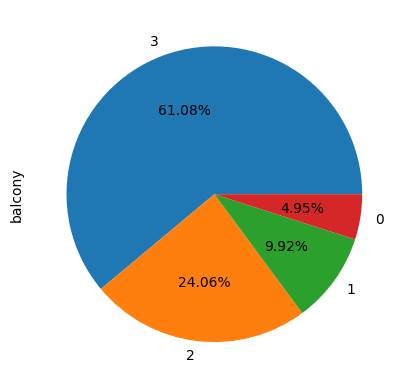

In [57]:
temp_df["balcony"].value_counts(normalize=True).plot(kind="pie", autopct="%0.2f%%");

#### Note: I mistakley treated `3+` balconies as 3 balconies 

### floorNum

In [58]:
temp_df["floorNum"].isnull().sum()

19

In [59]:
temp_df["floorNum"].value_counts().sort_values(ascending=False)

3.0     499
2.0     493
1.0     351
4.0     317
8.0     195
6.0     183
10.0    179
7.0     176
5.0     169
9.0     161
12.0    158
0.0     129
11.0    113
14.0    112
15.0     80
16.0     52
17.0     46
13.0     42
18.0     36
19.0     33
20.0     26
21.0     16
23.0     14
22.0     13
24.0     11
25.0      9
27.0      8
30.0      5
26.0      5
33.0      4
28.0      4
29.0      3
31.0      3
43.0      2
32.0      2
39.0      2
34.0      2
35.0      2
45.0      1
38.0      1
51.0      1
40.0      1
44.0      1
Name: floorNum, dtype: int64

In [60]:
temp_df["floorNum"].describe()

count    3660.000000
mean        6.796448
std         6.011317
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

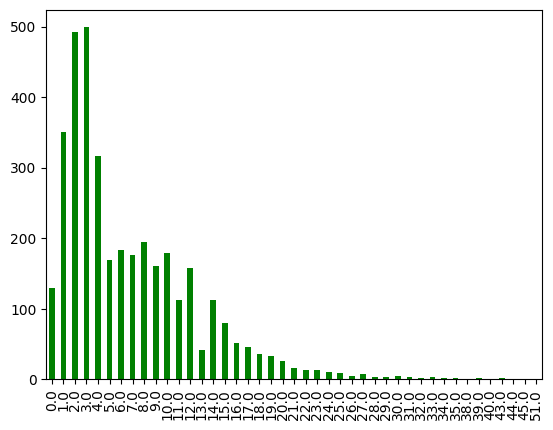

In [65]:
temp_df["floorNum"].value_counts().sort_index().plot(kind="bar", color="green");

<Axes: >

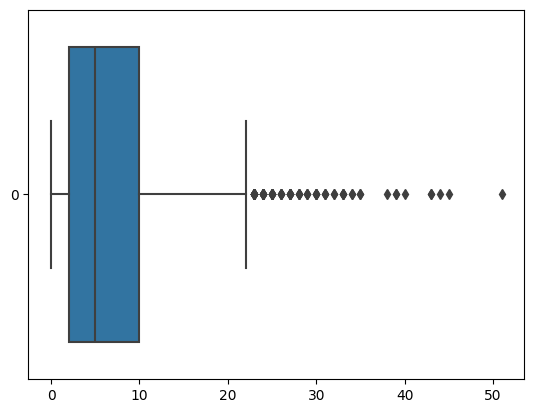

In [68]:
sns.boxplot(temp_df["floorNum"], orient="h")

#### Observations 
* Majority of the properties lies between 0th and 25th floor. 
* Most of the properties are lies in between 1st and 4th floor, while the 3rd floor is most common one.
* The boxplot is clearly showing that there are potential outliers that is some of the properties are at very high floor but their frequncy is much small.
* There are 19 missing values in this column.

### facing 

In [71]:
temp_df["facing"].value_counts()

East          624
North-East    624
North         387
West          249
South         231
North-West    193
South-East    173
South-West    153
Name: facing, dtype: int64

In [72]:
# check for null values 
temp_df["facing"].isnull().sum()

1045

In [73]:
temp_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

### agePossession

In [75]:
temp_df["agePossession"].isnull().sum()

0

In [76]:
temp_df["agePossession"].value_counts()

Relatively New        1646
New Property           594
Moderately Old         564
Undefined              438
Old Property           303
Under Construction     134
Name: agePossession, dtype: int64

In [77]:
temp_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

### super_built_up_area
* all the area of the property(which includes balconies and common area(lift))

In [80]:
temp_df["super_built_up_area"].isna().sum()

1804

In [89]:
temp_df["super_built_up_area"].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

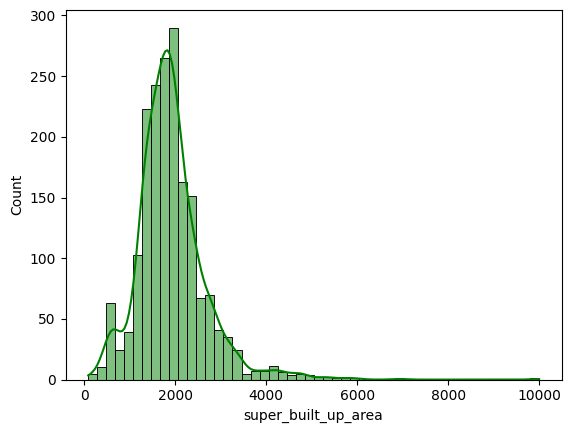

In [113]:
sns.histplot(temp_df["super_built_up_area"].dropna(), kde=True, color="green", bins=50);

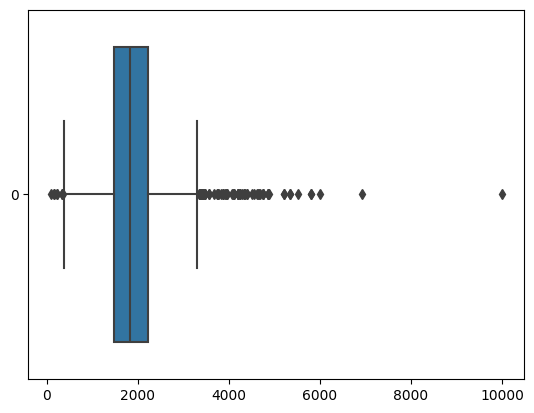

In [115]:
sns.boxplot(temp_df["super_built_up_area"], orient="h");

####  Observations 
* Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
* There are a few properties with a significantly larger area, leading to a right-skewed distribution.
* There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.
* The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
* There are 1804 missing values. 

### built_up_area

In [116]:
temp_df["built_up_area"].isna().sum()

2534

In [131]:
temp_df["built_up_area"].describe()

count      1145.000000
mean       2433.853073
std       21770.086402
min          30.000000
25%        1120.000000
50%        1600.000000
75%        2060.000000
max      737147.000000
Name: built_up_area, dtype: float64

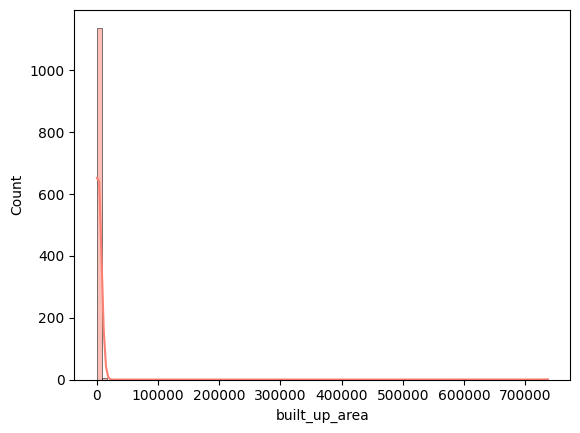

In [133]:
sns.histplot(temp_df["built_up_area"].dropna(), kde=True, bins=90, color="salmon");

<Axes: >

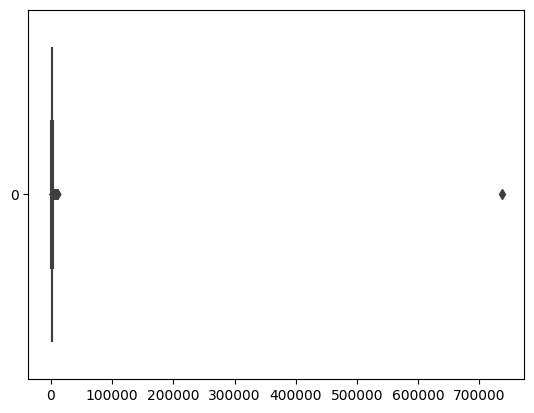

In [136]:
sns.boxplot(temp_df["built_up_area"], orient="h")

#### Observations 
* Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
* There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
* The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
* There are about 2534 missing values.

The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

### carpet_area

In [139]:
temp_df["carpet_area"].isnull().sum()

1807

In [140]:
temp_df["carpet_area"].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

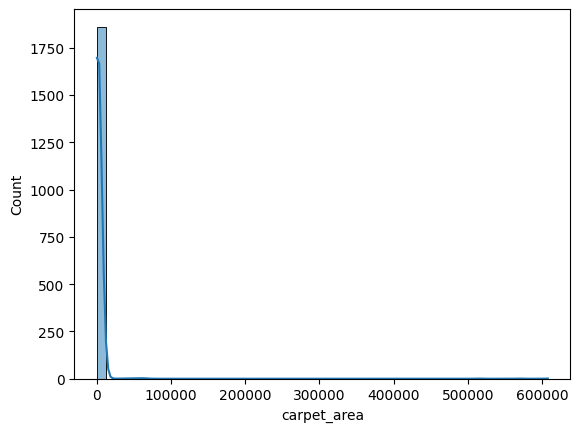

In [143]:
sns.histplot(temp_df["carpet_area"].dropna(), kde=True, bins=50);

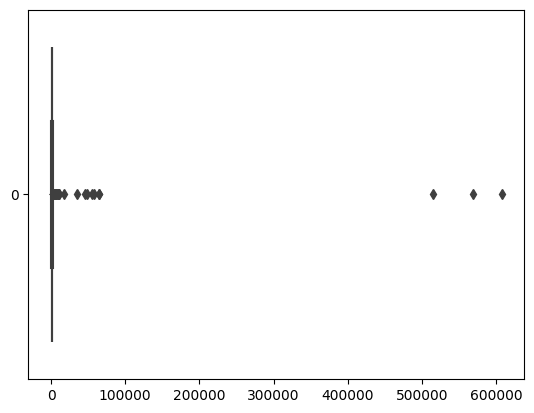

In [147]:
sns.boxplot(temp_df["carpet_area"], orient="h");

#### Observations 
same as built_up_area 

### study room, servant room, store room, pooja room, others

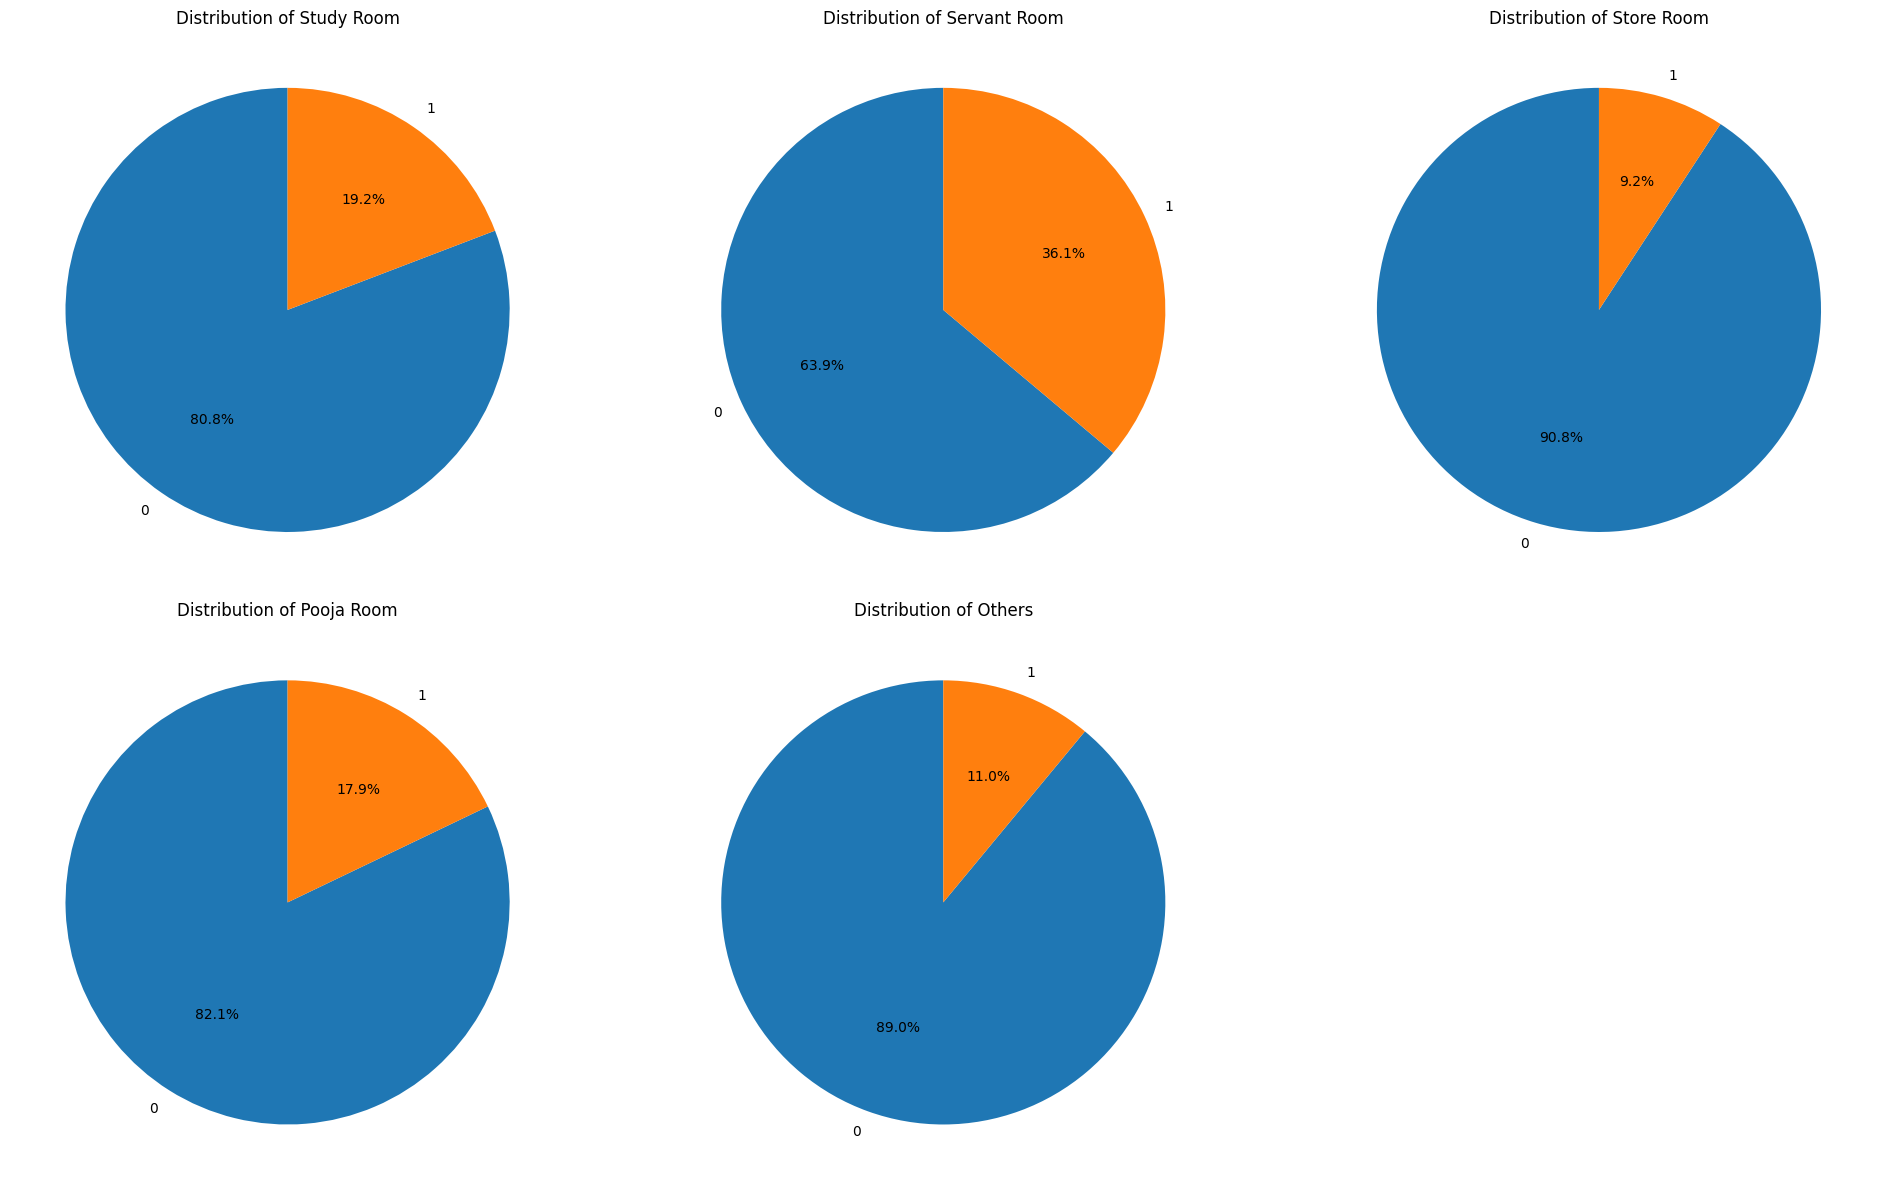

In [149]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    temp_df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [150]:
temp_df["furnishing_type"].isnull().sum()

0

In [151]:
temp_df["furnishing_type"].value_counts()

1    2415
0    1058
2     206
Name: furnishing_type, dtype: int64

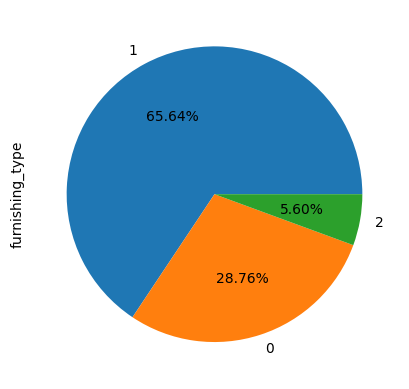

In [153]:
temp_df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%');

### luxury score 

In [156]:
temp_df["luxury_score"].isnull().sum()

0

In [157]:
temp_df["luxury_score"].describe()

count    3679.000000
mean       71.522968
std        53.055020
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

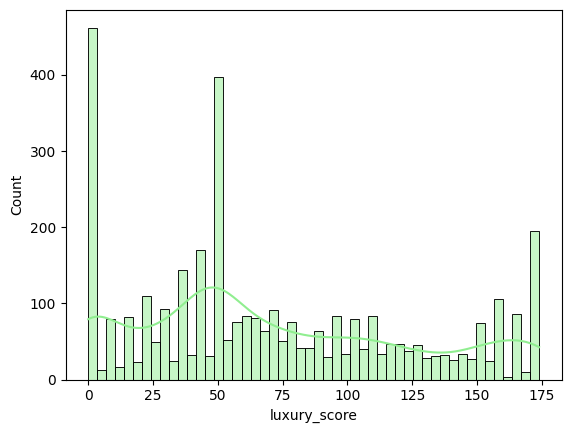

In [169]:
sns.histplot(temp_df['luxury_score'], bins=50, color='lightgreen', kde=True);

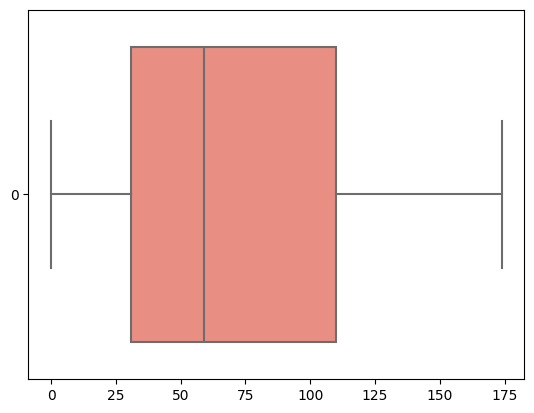

In [175]:
sns.boxplot(temp_df['luxury_score'], color='salmon', orient="h");

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 150-170 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.